<center><img src="Logolink_OP_VVV_hor_barva_cz.jpg" width="600px"/></center>
<center>ESF projekt Západočeské univerzity v Plzni reg. č. CZ.02.2.69/0.0/0.0/16 015/0002287</center>

# Image Segmentation

Segmentace - kompletní a částečná (vytvořené oblasti jsou homogenní vzhledem k zvoleným vlastnostem), využití apriorní informace

Techniky - prahovaní, hrany, narůstaní oblasti, rozdělovaní oblasti, srovnání se vzorem

Prahování - nenáročná, rychlá, volba prahu - interaktivně, automaticky

Detekce hran - canny, sobel

Narůstání oblasti - homogenita

Template matching

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import data
from skimage import morphology

Text(0.5, 1.0, 'histogram of grey values')

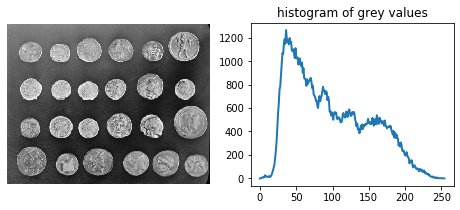

In [4]:
#nacteni a histogram
coins = data.coins()
hist = np.histogram(coins, bins=np.arange(0, 256))

plt.figure(figsize=(8, 3))
plt.subplot(121)
plt.imshow(coins, cmap=plt.cm.gray, interpolation='nearest')

plt.axis('off')
plt.subplot(122)
plt.plot(hist[1][:-1], hist[0], lw=2)
plt.title('histogram of grey values')

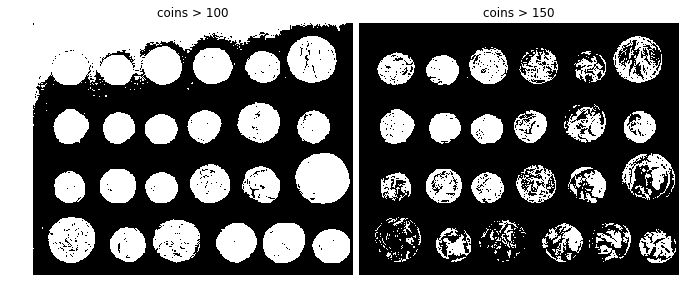

In [3]:
#primitivni segmentace
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plt.imshow(coins > 100, cmap=plt.cm.gray, interpolation='nearest')
plt.title('coins > 100')
plt.axis('off')

plt.subplot(122)
plt.imshow(coins > 150, cmap=plt.cm.gray, interpolation='nearest')
plt.title('coins > 150')
plt.axis('off')

plt.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0, right=1)

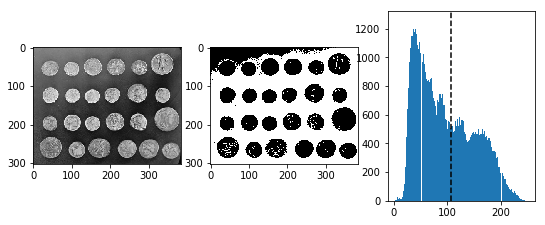

In [17]:
from skimage import data
from skimage import filters
from skimage import exposure

val = filters.threshold_otsu(coins)
mask = coins < val


plt.figure(figsize=(9, 3.5))
plt.gray()
plt.subplot(131)
plt.imshow(coins)

plt.subplot(132)
plt.imshow(mask)



#hist, bins_center = exposure.histogram(camera)
plt.subplot(133)
#plt.plot(bins_center, hist, lw=2)
plt.hist(coins.ravel(),256)
plt.axvline(val, color='k', ls='--')

plt.show()

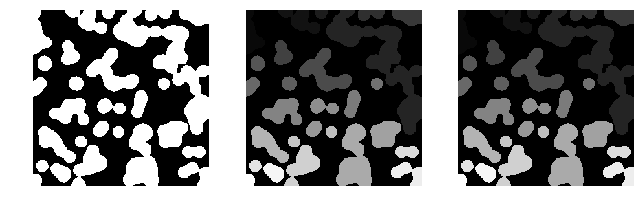

In [18]:
#labeling
import skimage.measure
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np

#
n = 12
l = 256
np.random.seed(1)
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))
blobs = im > 0.7 * im.mean()

all_labels = skimage.measure.label(blobs)
blobs_labels = skimage.measure.label(blobs, background=0)
plt.figure(figsize=(9, 3.5))
plt.subplot(131)
plt.imshow(blobs, cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(all_labels)
plt.axis('off')
plt.subplot(133)
plt.imshow(blobs_labels)
plt.axis('off')

plt.tight_layout()
plt.show()

Pocet minci je: 27


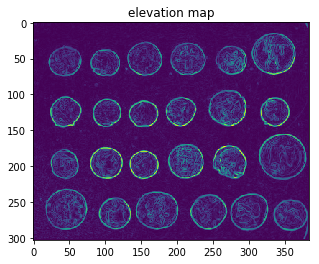

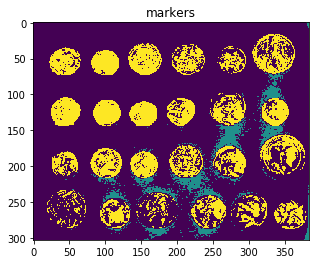

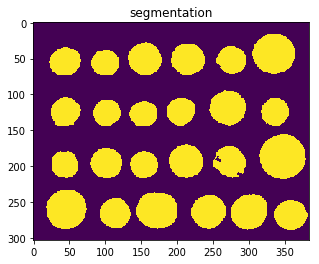

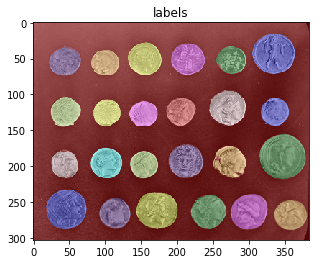

In [6]:
elevation_map = skimage.filters.sobel(coins)
plt.figure()
plt.title('elevation map')
plt.imshow(elevation_map)
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2
plt.figure()
plt.title('markers')
plt.imshow(markers)
segmentation = skimage.morphology.watershed(elevation_map, markers)
plt.figure()
plt.title('segmentation')
plt.imshow(segmentation)
image_label_overlay = skimage.color.label2rgb(skimage.measure.label(segmentation), image=coins) 
plt.figure()
plt.title('labels')
plt.imshow(coins)
plt.imshow(image_label_overlay)
print ("Pocet minci je:", skimage.measure.label(segmentation).max())

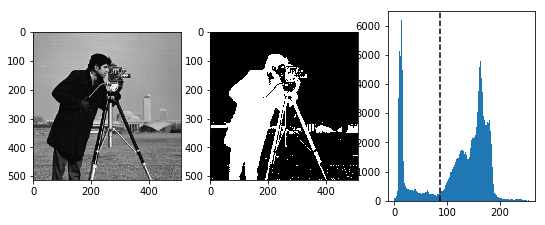

In [4]:
#Otsu's segmentation -  minimizing the intra-class variance is the same as maximizing inter-class variance
from skimage import data
from skimage import filters
from skimage import exposure

camera = data.camera()
val = filters.threshold_otsu(camera)
mask = camera < val


plt.figure(figsize=(9, 3.5))
plt.gray()
plt.subplot(131)
plt.imshow(camera)

plt.subplot(132)
plt.imshow(mask)



#hist, bins_center = exposure.histogram(camera)
plt.subplot(133)
#plt.plot(bins_center, hist, lw=2)
plt.hist(camera.ravel(),256)
plt.axvline(val, color='k', ls='--')

plt.show()

In [9]:
def naprahuj(image, threshold):
    threshold.insert(0, 0)
    im2 = np.empty(image.shape, dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]): 
            for k in range(len(threshold)):
                if threshold[len(threshold)- k - 1] <= image[i, j]:                  
                    im2[i, j] = np.uint8(np.round(np.double((len(threshold) - k - 1))))
                    break
    return im2

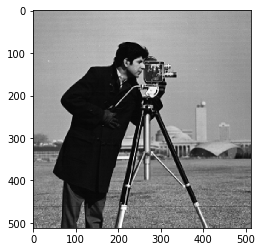

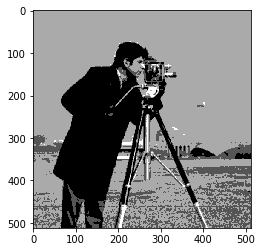

In [10]:
imgtr2 = naprahuj(camera, [50,120,200])
plt.figure()
plt.imshow(camera, cmap='gray')
plt.figure()
plt.imshow(imgtr2, cmap='gray')
plt.show()

Text(0.5, 1.0, 'Filling the holes')

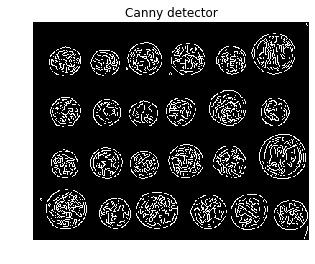

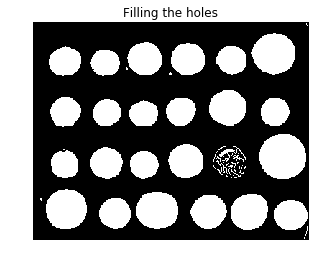

In [5]:
#segmentace na základě hran
from scipy import ndimage
from skimage import feature
edges = feature.canny(coins)

plt.imshow(edges, cmap= 'gray', interpolation = 'nearest')
plt.axis('off')
plt.title('Canny detector')

plt.figure()
fill_coins = ndimage.binary_fill_holes(edges)
plt.imshow(fill_coins, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Filling the holes')

Text(0.5, 1.0, 'elevation_map')

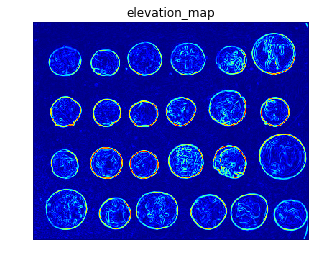

In [6]:
#Region-based segmentation
import skimage.morphology
elevation_map = skimage.filters.sobel(coins)

plt.imshow(elevation_map, cmap=plt.cm.jet, interpolation='nearest')
plt.axis('off')
plt.title('elevation_map')

Text(0.5, 1.0, 'markers')

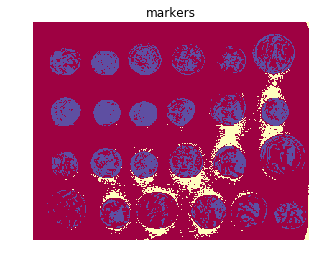

In [7]:
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 160] = 2
plt.imshow(markers, cmap='Spectral', interpolation='nearest')
plt.axis('off')
plt.title('markers')

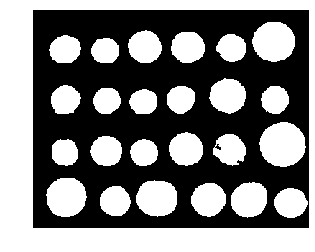

In [8]:
segmentation = skimage.morphology.watershed(elevation_map, markers)

plt.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.imshow(segmentation, cmap = 'gray')

In [12]:
segmentation = segmentation -1

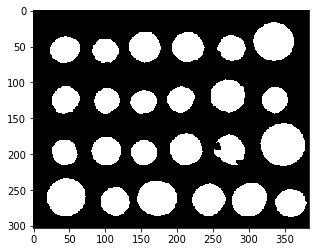

In [13]:
size = 3
kernel = np.ones((size,size))
erosion = skimage.morphology.binary_erosion(segmentation, kernel)
plt.imshow(erosion, cmap = 'gray')

Pocet minci je: 24


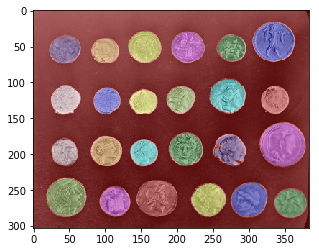

In [14]:
image_label_overlay = skimage.color.label2rgb(skimage.measure.label(erosion), image=coins)
plt.imshow(image_label_overlay)
print ("Pocet minci je:", skimage.measure.label(erosion).max())